<h2>The Problem</h2>

The grades.csv file contains grades of different assessments (homework, midterm,
project, final) for a group of students in a specific course. We are interested in
studying the relationship between the final exam grade (the target variable) and
other assessments (input variables).

<h2>Importing the Data</h2>

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [102]:
df = pd.read_csv("C:\\Users\\Bisan Co\\Desktop\\Machine Learning Course\\grades.csv")

In [103]:
df

,HW1,HW2,Midterm,Project,Final
0,0,78,32,87,71
1,0,37,25,91,48
2,63,100,34,92,59
3,70,93,35,92,64
4,50,75,20,76,42
5,43,0,26,55,54
6,0,47,22,0,37
7,47,80,26,94,56
8,97,97,30,92,60
9,50,67,21,76,38


In [104]:
df.shape

(32, 5)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   HW1      32 non-null     int64
 1   HW2      32 non-null     int64
 2   Midterm  32 non-null     int64
 3   Project  32 non-null     int64
 4   Final    32 non-null     int64
dtypes: int64(5)
memory usage: 1.4 KB


<h2> Question 1 </h2>

Some values are missing (indicated by 0 value). Address all the missing values
by using the average of the available values for the corresponding variable.

In [106]:
df['HW1']=df['HW1'].replace(0,df['HW1'].mean())
df['HW2']=df['HW2'].replace(0,df['HW2'].mean())
df['Midterm']=df['Midterm'].replace(0,df['Midterm'].mean())
df['Project']=df['Project'].replace(0,df['Project'].mean())
df['Final']=df['Final'].replace(0,df['Final'].mean())

In [107]:
df

,HW1,HW2,Midterm,Project,Final
0,60.53125,78.0000,32.00000,87.00000,71.000
1,60.53125,37.0000,25.00000,91.00000,48.000
2,63.00000,100.0000,34.00000,92.00000,59.000
3,70.00000,93.0000,35.00000,92.00000,64.000
4,50.00000,75.0000,20.00000,76.00000,42.000
5,43.00000,77.1875,26.00000,55.00000,54.000
6,60.53125,47.0000,22.00000,82.90625,37.000
7,47.00000,80.0000,26.00000,94.00000,56.000
8,97.00000,97.0000,30.00000,92.00000,60.000
9,50.00000,67.0000,21.00000,76.00000,38.000


<h2> Question 2 </h2>

Using data science techniques that we discussed in the course, examine which
of the input variables would be a good predictor for the final exam.

In [108]:
cor = df.corr()
cor.style.background_gradient(cmap="coolwarm")

,HW1,HW2,Midterm,Project,Final
HW1,1.000000,0.234869,0.643964,0.499241,0.607440
HW2,0.234869,1.000000,0.533002,0.243666,0.535352
Midterm,0.643964,0.533002,1.000000,0.563627,0.917941
Project,0.499241,0.243666,0.563627,1.000000,0.512569
Final,0.607440,0.535352,0.917941,0.512569,1.000000


In [109]:
cor = df.corrwith(df['Final'])
so = cor.sort_values(kind="quicksort")
print (so)

Project    0.512569
HW2        0.535352
HW1        0.607440
Midterm    0.917941
Final      1.000000
dtype: float64


Frow what we see from the correlation results above, the midterm marks gives us the best correlation to the Final.

<h2> Question 3 </h2>

Implement the closed form solution of linear regression and use it to learn a
linear model to predict the final exam from the variable you selected in part 2.

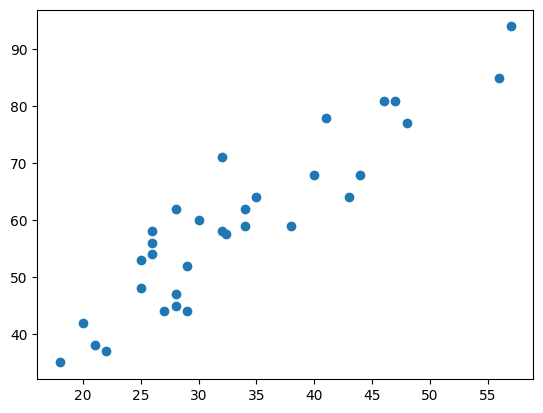

In [110]:
mid = df.iloc[:,2 :3 ]
final = df.iloc[:,4 : ]
plt.scatter(mid, final)

In [111]:
def find_theta(X,y):
    m = X.shape[0]
    X = np.append(X, np.ones((m,1)), axis=1)    
    #y = y.reshape(m,1)
    
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    
    return theta

In [112]:
def predict(X):
    
    X = np.append(X, np.ones((X.shape[0],1)), axis=1)
    
    preds = np.dot(X, theta)
    
    return preds

In [113]:
theta = find_theta(mid, final)
theta

array([[ 1.34463165],
       [14.57627542]])

In [114]:
preds = predict(mid)
preds

array([[57.60448819],
       [48.19206664],
       [60.29375148],
       [61.63838313],
       [41.4689084 ],
       [49.53669829],
       [44.1581717 ],
       [49.53669829],
       [54.91522489],
       [42.81354005],
       [38.7796451 ],
       [52.22596159],
       [53.57059324],
       [49.53669829],
       [53.57059324],
       [52.22596159],
       [52.22596159],
       [50.88132994],
       [68.36154138],
       [91.22027941],
       [89.87564776],
       [60.29375148],
       [57.60448819],
       [58.06670532],
       [73.74006797],
       [48.19206664],
       [76.42933127],
       [72.39543633],
       [79.11859457],
       [69.70617303],
       [77.77396292],
       [65.67227808]])

Text(0, 0.5, 'y - target')

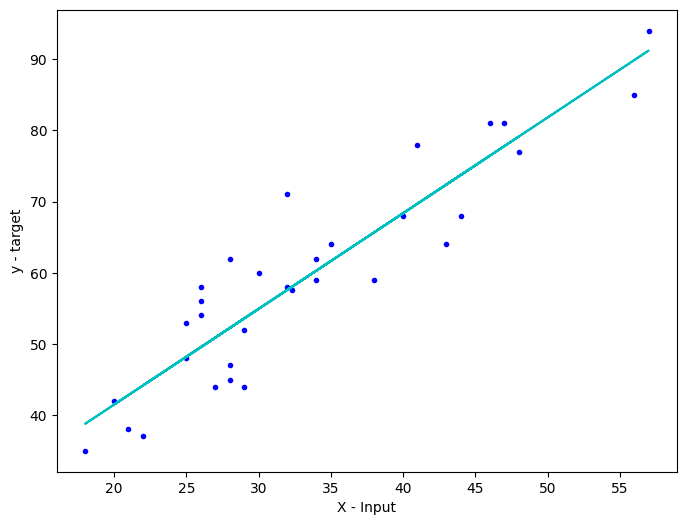

In [115]:
fig = plt.figure(figsize=(8,6))
plt.plot(mid, final, 'b.')
plt.plot(mid, preds, 'c-')
plt.xlabel('X - Input')
plt.ylabel('y - target')

<h2> Question 4 </h2>

Repeat part 3 but now by implementing the gradient descent algorithm.

In [130]:
featuers = df.iloc[:,2 :3 ]
featuers.insert(0, 'Ones', 1)

In [131]:
arr = featuers.to_numpy()
arr2 = final.to_numpy()
weights = np.zeros((2,1))
bias =0
m=32
lr=0.0001
#losses = []
i=1
for i in range (100):
    y_hat = np.dot(arr, weights)
    #loss = np.mean((y_hat - arr2)**2)
    #losses.append(loss)
    dw = (2/m)*np.sum(np.dot(arr.T, (y_hat - arr2)))
    weights -= lr*dw

In [134]:
np.sum((np.dot(arr, weights) - arr2)**2)/32

46.64010780955576

Text(0, 0.5, 'y (Target) : Final')

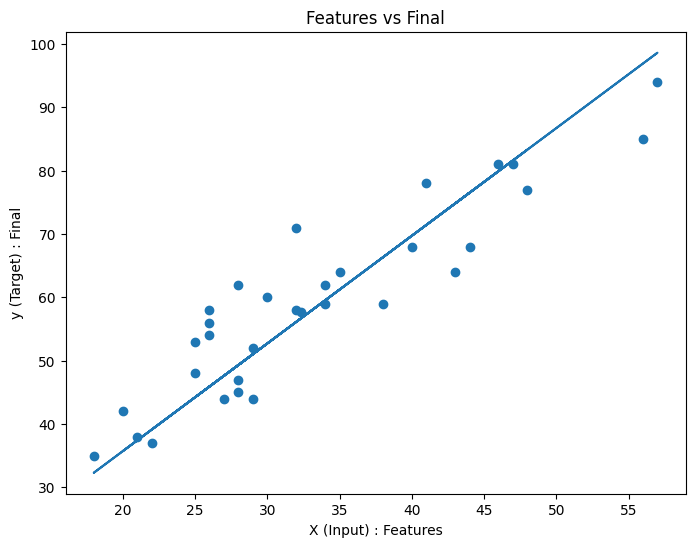

In [136]:
fig = plt.figure(figsize=(8,6))
plt.scatter(mid, final)
plt.plot(arr[:,1], np.dot(arr, weights))  # X and predictions.
plt.title('Features vs Final')
plt.xlabel('X (Input) : Features')
plt.ylabel('y (Target) : Final')

<h2> Question 5 </h2>

Repeat part 3 but now using the linear regression implementation of scikitlearn python library.

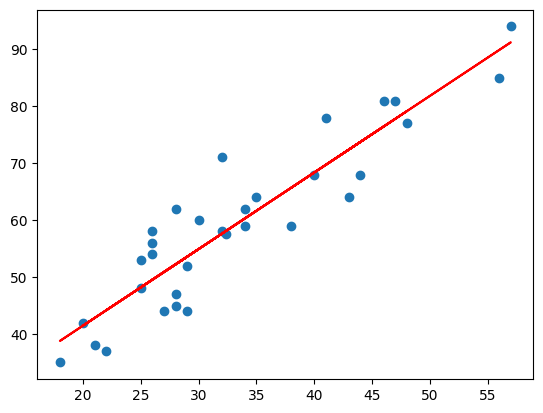

In [140]:
X = df.iloc[:,2 :3 ].to_numpy()
Y = final.to_numpy()

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

<h2> Question 6 </h2>

Compare the answers from part 3, 4, and 5. In each case compute the error of the
learned models.

Error for implementerd linear regression is:

In [144]:
np.sum((preds - arr2)**2)/32

33.18404402064998

Error for implementerd gradient descent is:

In [149]:
np.sum((np.dot(arr, weights) - arr2)**2)/32

46.64010780955576

Error for Scikit-learn library linear regression is:

In [142]:
((Y_pred-final)**2).mean()

Final    33.184044
dtype: float64

Baed on the errors given apove we can see that the linear geression is much better to use as learning algorithm for our given dataset and results that gradient descent.